# Hong Kong Temperature & Mandelbrot Set Visualization Tutorial

This notebook explains two fascinating topics:
1. **Temperature Data Visualization** - Creating beautiful charts from Hong Kong weather data
2. **Mandelbrot Set Mathematics** - Understanding and visualizing fractal geometry

We'll combine both concepts to create stunning mathematical art influenced by real weather data.

## Learning Objectives
- Understand how to fetch and visualize temperature data
- Learn the mathematics behind the Mandelbrot Set
- Create beautiful fractal visualizations
- Combine real-world data with mathematical art

## Part 1: Import Required Libraries

Let's start by importing all the libraries we need for data fetching, mathematical calculations, and visualization.

In [1]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Set up matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("📚 All libraries imported successfully!")
print("🎨 Ready to create beautiful visualizations!")

📚 All libraries imported successfully!
🎨 Ready to create beautiful visualizations!


## Part 2: Understanding Temperature Data

Let's fetch real temperature data from Hong Kong Observatory and understand how to work with it.

In [2]:
def fetch_hk_temperature():
    """
    Fetch current temperature data from Hong Kong Observatory API
    Returns temperature and humidity values, or simulated data if API fails
    """
    try:
        # Hong Kong Observatory API endpoint
        url = "https://data.weather.gov.hk/weatherAPI/opendata/weather.php"
        params = {"dataType": "rhrread", "lang": "en"}
        
        response = requests.get(url, params=params, timeout=5)
        data = response.json()
        
        # Extract temperature from King's Park station (usually available)
        temperature_data = data.get('temperature', {}).get('data', [])
        humidity_data = data.get('humidity', {}).get('data', [])
        
        if temperature_data:
            # Get the first available temperature reading
            temp = temperature_data[0]['value']
            place = temperature_data[0]['place']
            
            # Get humidity if available
            humidity = None
            if humidity_data:
                humidity = humidity_data[0]['value']
            
            print(f"🌡️ Current temperature in {place}: {temp}°C")
            if humidity:
                print(f"💧 Current humidity: {humidity}%")
            
            return temp, humidity, place
        else:
            raise ValueError("No temperature data available")
            
    except Exception as e:
        print(f"⚠️ API fetch failed: {e}")
        print("📊 Using simulated Hong Kong temperature data...")
        
        # Simulate realistic Hong Kong temperature (25-30°C range)
        import random
        temp = round(random.uniform(25.0, 30.0), 1)
        humidity = round(random.uniform(60, 80), 0)
        
        print(f"🌡️ Simulated temperature: {temp}°C")
        print(f"💧 Simulated humidity: {humidity}%")
        
        return temp, humidity, "Hong Kong (Simulated)"

# Fetch current temperature
current_temp, current_humidity, location = fetch_hk_temperature()

🌡️ Current temperature in King's Park: 27°C
💧 Current humidity: 82%


C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\2159240270.py:75: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\2159240270.py:75: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\lyj\Desktop\ime\5913\HK tem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lyj\Desktop\ime\5913\HK tem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


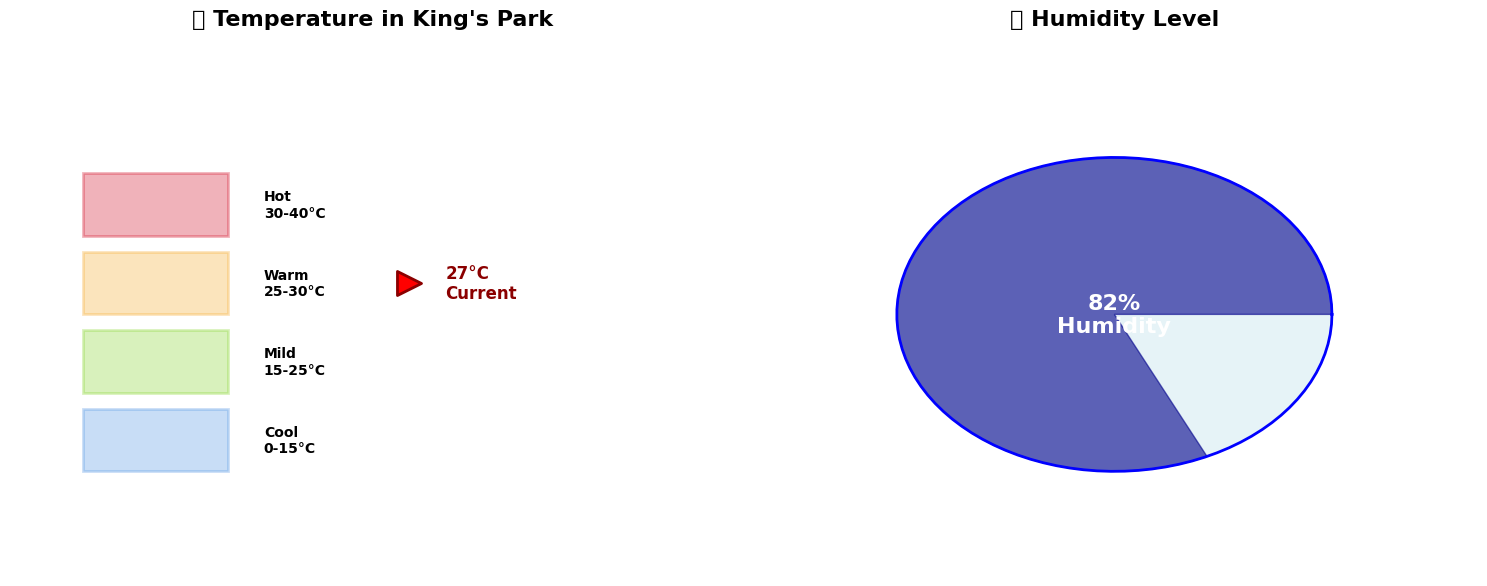

In [3]:
def create_temperature_chart(temp, humidity, location):
    """
    Create a beautiful temperature visualization chart
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Chart 1: Temperature Gauge
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    
    # Create temperature zones with colors
    zones = [
        (0, 15, '#4A90E2', 'Cool'),      # Blue - Cool
        (15, 25, '#7ED321', 'Mild'),     # Green - Mild  
        (25, 30, '#F5A623', 'Warm'),     # Orange - Warm
        (30, 40, '#D0021B', 'Hot')       # Red - Hot
    ]
    
    # Draw temperature zones
    for i, (min_temp, max_temp, color, label) in enumerate(zones):
        rect = plt.Rectangle((1, 2 + i * 1.5), 2, 1.2, 
                           facecolor=color, alpha=0.3, edgecolor=color, linewidth=2)
        ax1.add_patch(rect)
        ax1.text(3.5, 2.6 + i * 1.5, f'{label}\n{min_temp}-{max_temp}°C', 
                fontsize=10, va='center', ha='left', weight='bold')
    
    # Mark current temperature
    current_zone_index = 0
    for i, (min_temp, max_temp, color, label) in enumerate(zones):
        if min_temp <= temp < max_temp:
            current_zone_index = i
            break
    
    # Draw current temperature indicator
    indicator_y = 2.6 + current_zone_index * 1.5
    ax1.scatter([5.5], [indicator_y], s=300, c='red', marker='>', 
               edgecolor='darkred', linewidth=2, zorder=10)
    ax1.text(6, indicator_y, f'{temp}°C\nCurrent', fontsize=12, weight='bold',
            ha='left', va='center', color='darkred')
    
    ax1.set_title(f'🌡️ Temperature in {location}', fontsize=16, weight='bold', pad=20)
    ax1.axis('off')
    
    # Chart 2: Humidity Visualization
    if humidity:
        # Create a circular humidity indicator
        angles = np.linspace(0, 2 * np.pi, 100)
        circle_x = 5 + 3 * np.cos(angles)
        circle_y = 5 + 3 * np.sin(angles)
        
        # Background circle
        ax2.fill(circle_x, circle_y, color='lightblue', alpha=0.3)
        ax2.plot(circle_x, circle_y, color='blue', linewidth=2)
        
        # Humidity fill (proportional to humidity percentage)
        humidity_ratio = humidity / 100
        fill_angles = np.linspace(0, 2 * np.pi * humidity_ratio, int(100 * humidity_ratio))
        fill_x = np.concatenate([[5], 5 + 3 * np.cos(fill_angles), [5]])
        fill_y = np.concatenate([[5], 5 + 3 * np.sin(fill_angles), [5]])
        
        ax2.fill(fill_x, fill_y, color='darkblue', alpha=0.6)
        
        # Add humidity text
        ax2.text(5, 5, f'{humidity}%\nHumidity', fontsize=16, weight='bold',
                ha='center', va='center', color='white')
    else:
        ax2.text(5, 5, 'Humidity\nData\nNot Available', fontsize=14, weight='bold',
                ha='center', va='center')
    
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
    ax2.set_title('💧 Humidity Level', fontsize=16, weight='bold', pad=20)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return temp, humidity

# Create the temperature chart
temp_value, humidity_value = create_temperature_chart(current_temp, current_humidity, location)

## Part 3: Understanding the Mandelbrot Set

The **Mandelbrot Set** is a fascinating mathematical object that creates beautiful fractal patterns. Let's understand the mathematics behind it:

### The Mathematics
For each complex number `c`, we iterate the formula: **z = z² + c**
- We start with z₀ = 0
- Calculate z₁ = 0² + c = c  
- Calculate z₂ = c² + c
- Continue iterating...

If the sequence stays bounded (doesn't go to infinity), then `c` belongs to the Mandelbrot Set.

### Why It's Beautiful
- The boundary creates infinitely detailed fractal patterns
- Zooming in reveals self-similar structures at every scale
- Different iteration counts create stunning color gradients

In [4]:
def mandelbrot_iterations(c, max_iter=50):
    """
    Calculate how many iterations it takes for a complex number to escape
    
    Args:
        c: Complex number to test
        max_iter: Maximum iterations before we assume it's in the set
    
    Returns:
        Number of iterations before escape (or max_iter if it doesn't escape)
    """
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:  # If |z| > 2, it will escape to infinity
            return n
        z = z*z + c
    return max_iter

def create_mandelbrot_simple(width=300, height=300):
    """
    Create a simple black and white Mandelbrot Set visualization
    """
    # Define the complex plane bounds
    x_min, x_max = -2.5, 1.5
    y_min, y_max = -2.0, 2.0
    
    # Create coordinate arrays
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    
    # Create empty array for results
    mandelbrot_set = np.zeros((height, width))
    
    print("🔢 Calculating Mandelbrot Set...")
    
    # Calculate Mandelbrot set for each point
    for i in range(height):
        for j in range(width):
            # Convert pixel coordinates to complex number
            c = complex(x[j], y[i])
            mandelbrot_set[i, j] = mandelbrot_iterations(c)
        
        # Show progress every 50 rows
        if i % 50 == 0:
            print(f"   Progress: {i}/{height} rows ({100*i/height:.1f}%)")
    
    return mandelbrot_set, (x_min, x_max, y_min, y_max)

# Create a simple Mandelbrot set (this will take a moment)
mandelbrot_data, bounds = create_mandelbrot_simple()

print("✅ Mandelbrot Set calculation complete!")
print(f"📊 Generated {mandelbrot_data.shape[0]}x{mandelbrot_data.shape[1]} pixel image")

🔢 Calculating Mandelbrot Set...
   Progress: 0/300 rows (0.0%)
   Progress: 50/300 rows (16.7%)
   Progress: 100/300 rows (33.3%)
   Progress: 150/300 rows (50.0%)
   Progress: 200/300 rows (66.7%)
   Progress: 250/300 rows (83.3%)
✅ Mandelbrot Set calculation complete!
📊 Generated 300x300 pixel image


C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\1768135608.py:23: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\lyj\Desktop\ime\5913\HK tem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


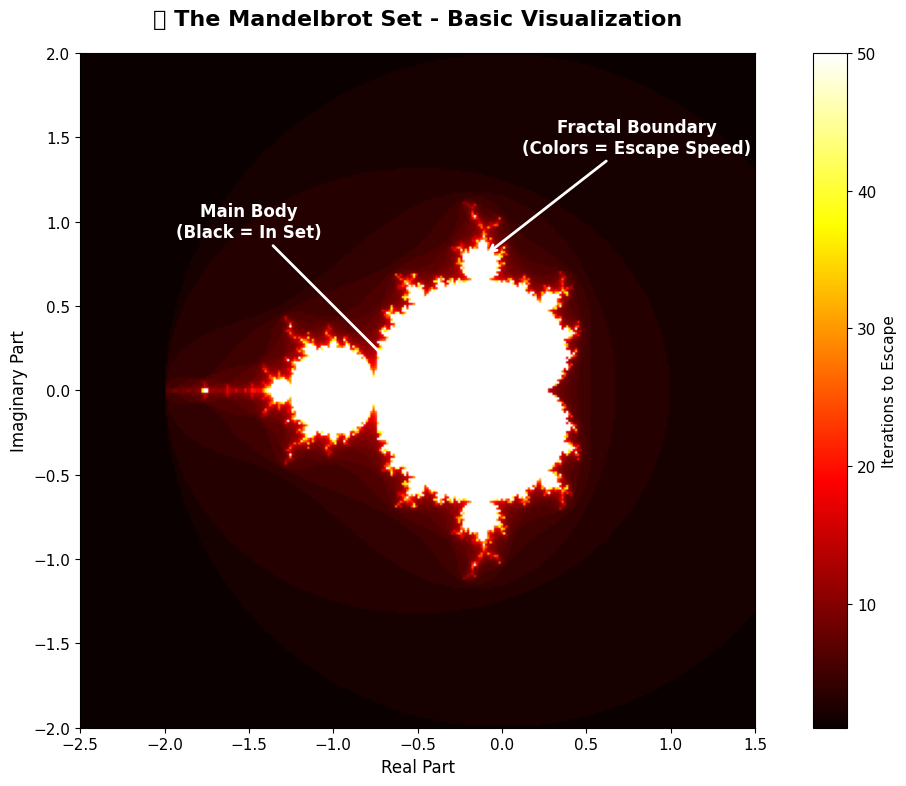

🎭 The colors show how quickly points escape to infinity
🖤 Black areas are points that never escape (they're IN the Mandelbrot Set)
🌈 Colored areas escape at different speeds, creating beautiful patterns


In [5]:
# Visualize the basic Mandelbrot Set
plt.figure(figsize=(12, 8))

# Show the Mandelbrot set
plt.imshow(mandelbrot_data, extent=bounds, cmap='hot', origin='lower')
plt.colorbar(label='Iterations to Escape')
plt.title('🎨 The Mandelbrot Set - Basic Visualization', fontsize=16, weight='bold', pad=20)
plt.xlabel('Real Part', fontsize=12)
plt.ylabel('Imaginary Part', fontsize=12)

# Add some annotations to explain key features
plt.annotate('Main Body\n(Black = In Set)', xy=(-0.5, 0), xytext=(-1.5, 1),
            arrowprops=dict(arrowstyle='->', color='white', lw=2),
            fontsize=12, color='white', weight='bold',
            ha='center', va='center')

plt.annotate('Fractal Boundary\n(Colors = Escape Speed)', 
            xy=(-0.1, 0.8), xytext=(0.8, 1.5),
            arrowprops=dict(arrowstyle='->', color='white', lw=2),
            fontsize=12, color='white', weight='bold',
            ha='center', va='center')

plt.tight_layout()
plt.show()

print("🎭 The colors show how quickly points escape to infinity")
print("🖤 Black areas are points that never escape (they're IN the Mandelbrot Set)")
print("🌈 Colored areas escape at different speeds, creating beautiful patterns")

## Part 4: Fast Mandelbrot Generation

Let's create a much faster version using NumPy's vectorized operations. This will be 10-100x faster!

In [6]:
def create_fast_mandelbrot(width=400, height=400, max_iter=80,
                          x_min=-2.5, x_max=1.5, y_min=-2.0, y_max=2.0):
    """
    Fast vectorized Mandelbrot set generation using NumPy
    Much faster than the nested loop version!
    """
    # Create coordinate grids
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    X, Y = np.meshgrid(x, y)
    
    # Create complex number grid
    C = X + 1j * Y
    
    # Initialize arrays
    Z = np.zeros_like(C)
    M = np.full(C.shape, max_iter, dtype=int)
    
    # Vectorized iteration
    for i in range(max_iter):
        # Find points that haven't escaped yet
        mask = np.abs(Z) <= 2
        
        # Update Z only for points that haven't escaped
        Z[mask] = Z[mask]**2 + C[mask]
        
        # Record escape time
        escape_mask = (np.abs(Z) > 2) & (M == max_iter)
        M[escape_mask] = i
    
    return M, (x_min, x_max, y_min, y_max)

print("⚡ Creating fast Mandelbrot set...")
fast_mandelbrot, fast_bounds = create_fast_mandelbrot()
print("✅ Fast calculation complete!")

⚡ Creating fast Mandelbrot set...
✅ Fast calculation complete!


## Part 5: Beautiful Color Schemes

Now let's create stunning visualizations with different color schemes and artistic effects.

C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\2641462634.py:27: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\2641462634.py:27: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\2641462634.py:27: UserWarning: Glyph 127749 (\N{SUNRISE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\lyj\Desktop\ime\5913\HK tem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lyj\Desktop\ime\5913\HK tem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lyj\Desktop\ime\5913\HK tem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

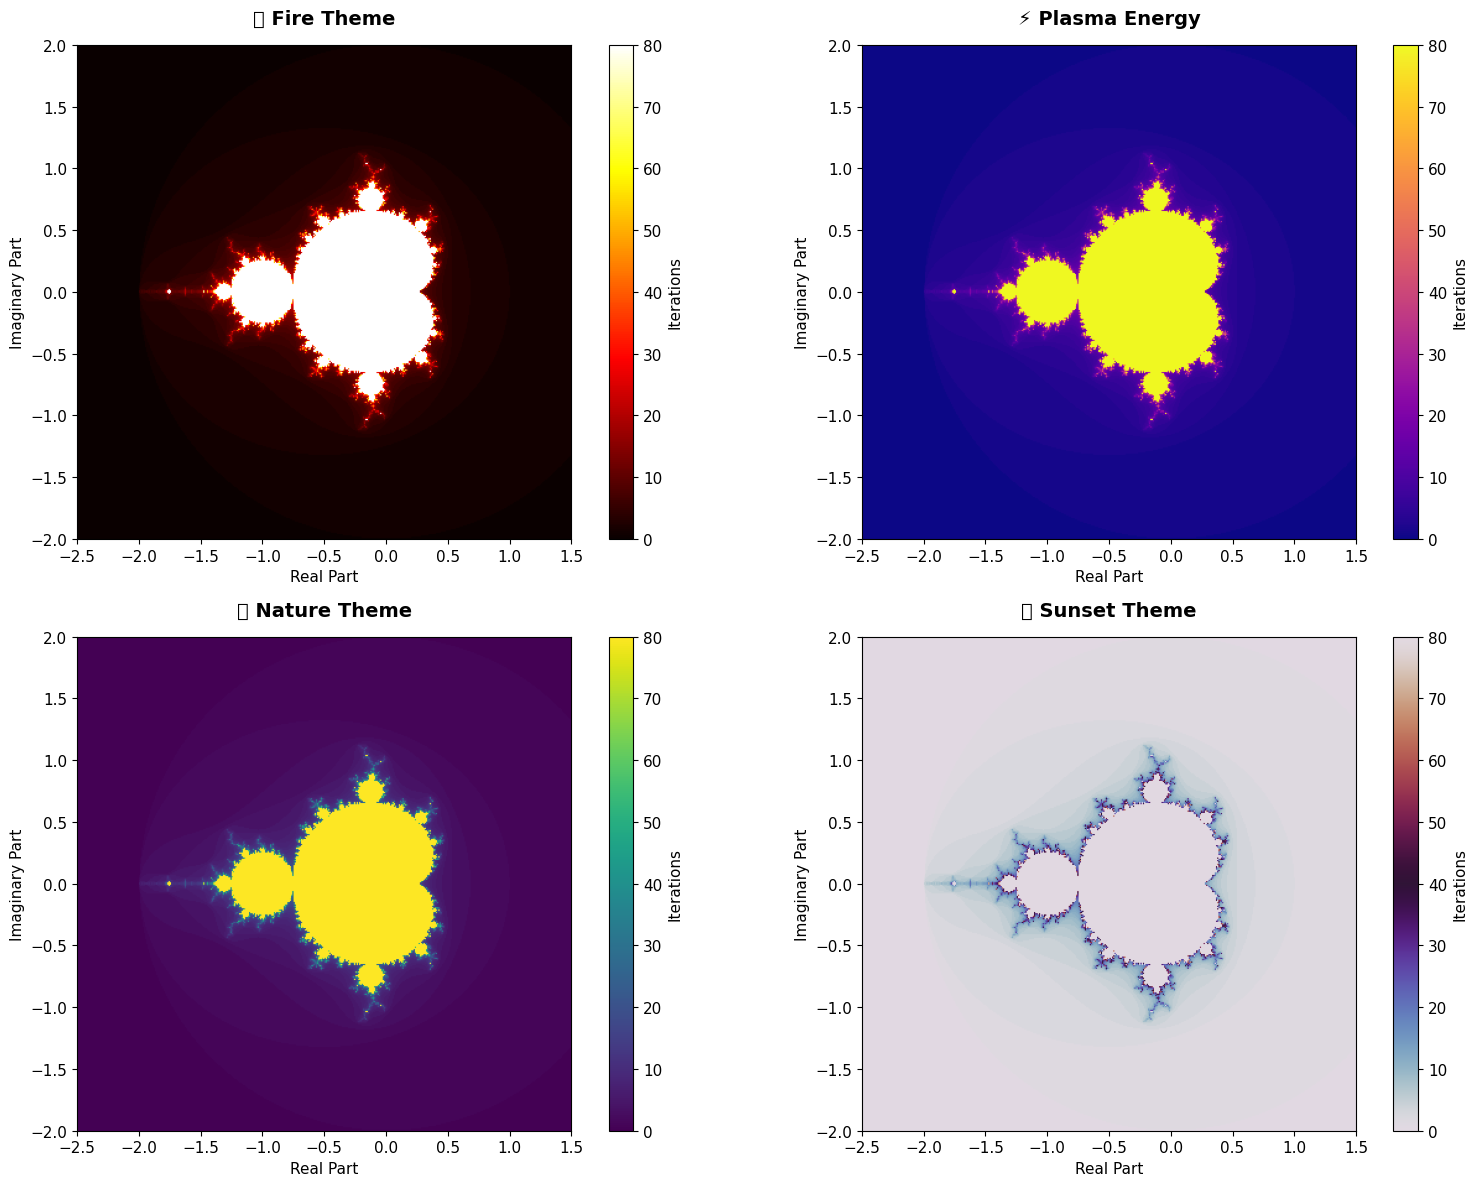

🎨 Different color schemes create completely different artistic moods!
🎭 Each one reveals different aspects of the fractal structure


In [7]:
# Create multiple beautiful visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Different color schemes and effects
color_schemes = [
    ('hot', '🔥 Fire Theme'),
    ('plasma', '⚡ Plasma Energy'), 
    ('viridis', '🌿 Nature Theme'),
    ('twilight', '🌅 Sunset Theme')
]

for i, (cmap, title) in enumerate(color_schemes):
    ax = axes[i]
    
    # Create the visualization
    im = ax.imshow(fast_mandelbrot, extent=fast_bounds, 
                   cmap=cmap, origin='lower')
    
    ax.set_title(title, fontsize=14, weight='bold', pad=15)
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    
    # Add colorbar
    plt.colorbar(im, ax=ax, label='Iterations')

plt.tight_layout()
plt.show()

print("🎨 Different color schemes create completely different artistic moods!")
print("🎭 Each one reveals different aspects of the fractal structure")

## Part 6: Temperature-Influenced Mandelbrot Art

Now comes the exciting part! Let's combine our Hong Kong temperature data with the Mandelbrot Set to create unique mathematical art that reflects the current weather.

🎨 Creating Mandelbrot art influenced by 27°C temperature...


C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\1069330656.py:68: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\1069330656.py:68: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\1069330656.py:68: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\1069330656.py:68: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\1069330656.py:68: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\1069330656.py:68: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


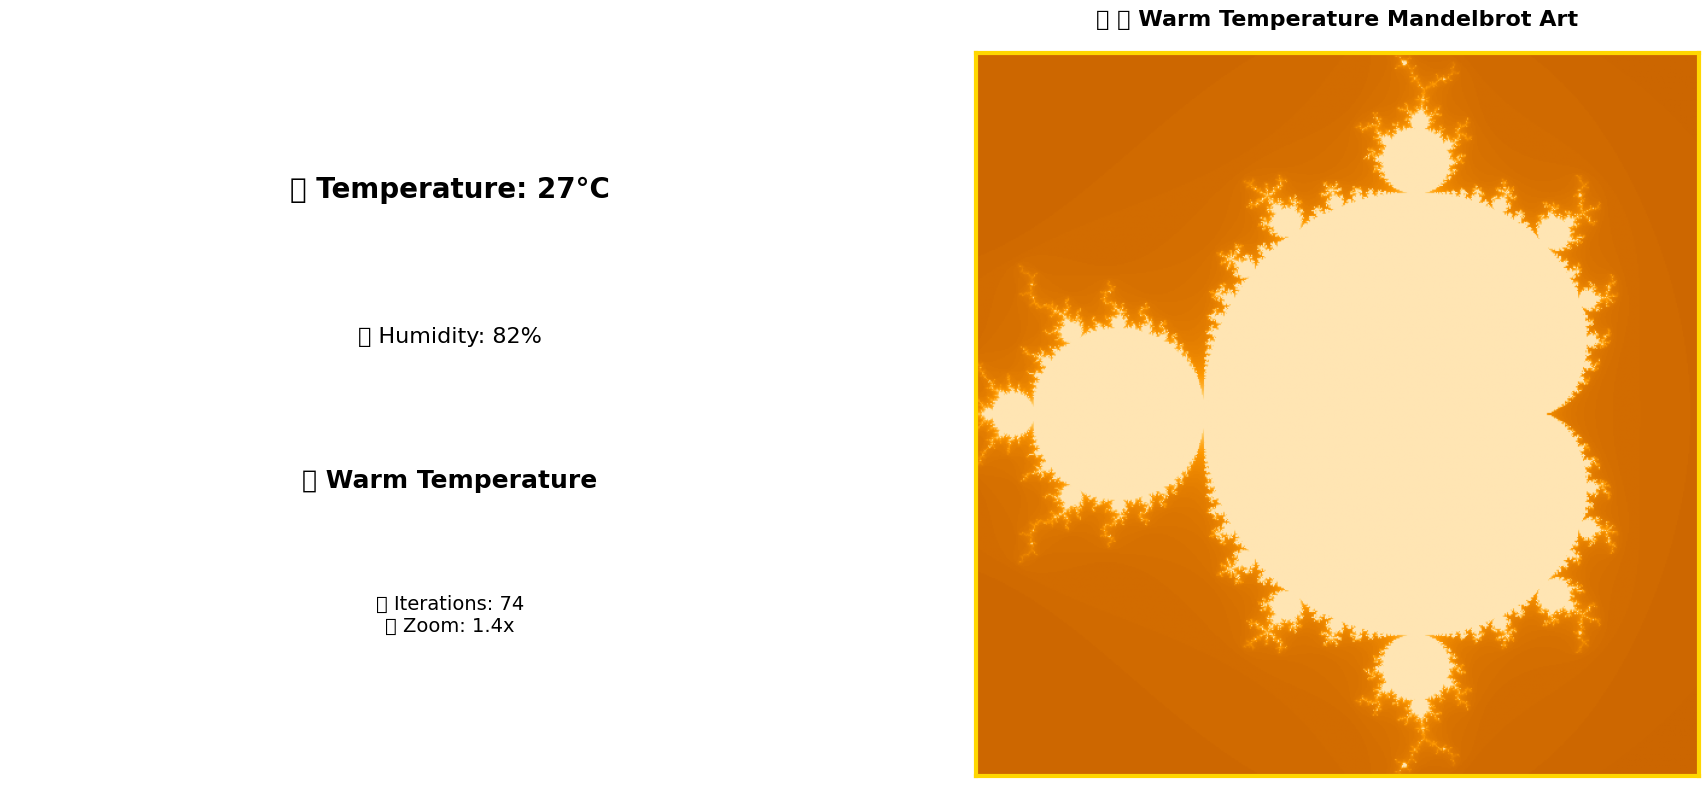

In [8]:
def create_temperature_mandelbrot_fusion(temp, humidity):
    """
    Create a Mandelbrot visualization influenced by temperature data
    """
    # Temperature influences the color scheme and parameters
    if temp < 20:
        base_colors = ['#000080', '#0066CC', '#66B2FF', '#B3D9FF']  # Cool blues
        theme_name = "❄️ Cool Temperature"
    elif temp < 25:
        base_colors = ['#004D00', '#00B300', '#66FF66', '#B3FFB3']  # Fresh greens  
        theme_name = "🍃 Mild Temperature"
    elif temp < 30:
        base_colors = ['#CC6600', '#FF9900', '#FFCC66', '#FFE5B3']  # Warm oranges
        theme_name = "🌞 Warm Temperature"
    else:
        base_colors = ['#800000', '#CC0000', '#FF6666', '#FFB3B3']  # Hot reds
        theme_name = "🔥 Hot Temperature"
    
    # Create custom colormap based on temperature
    temp_cmap = LinearSegmentedColormap.from_list("temperature", base_colors, N=256)
    
    # Humidity influences the zoom and iteration count
    zoom_factor = 1 + (humidity or 70) / 200  # Higher humidity = more zoom
    max_iterations = int(60 + (temp - 20) * 2)  # Warmer = more iterations
    
    # Create the Mandelbrot set with temperature-influenced parameters
    mandelbrot_art, bounds = create_fast_mandelbrot(
        width=600, height=600, 
        max_iter=max_iterations,
        x_min=-2.0/zoom_factor, x_max=1.0/zoom_factor,
        y_min=-1.5/zoom_factor, y_max=1.5/zoom_factor
    )
    
    # Create the artistic visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Left: Temperature info
    ax1.text(0.5, 0.8, f'🌡️ Temperature: {temp}°C', 
             fontsize=20, weight='bold', ha='center', transform=ax1.transAxes)
    
    if humidity:
        ax1.text(0.5, 0.6, f'💧 Humidity: {humidity}%', 
                 fontsize=16, ha='center', transform=ax1.transAxes)
    
    ax1.text(0.5, 0.4, f'{theme_name}', 
             fontsize=18, weight='bold', ha='center', transform=ax1.transAxes)
    
    ax1.text(0.5, 0.2, f'🎨 Iterations: {max_iterations}\n📐 Zoom: {zoom_factor:.1f}x', 
             fontsize=14, ha='center', transform=ax1.transAxes)
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.axis('off')
    
    # Right: Temperature-influenced Mandelbrot
    im = ax2.imshow(mandelbrot_art, extent=bounds, cmap=temp_cmap, origin='lower')
    ax2.set_title(f'🎭 {theme_name} Mandelbrot Art', fontsize=16, weight='bold', pad=20)
    
    # Remove axis labels for artistic effect
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # Add artistic border
    for spine in ax2.spines.values():
        spine.set_linewidth(3)
        spine.set_color('gold')
    
    plt.tight_layout()
    plt.show()
    
    return mandelbrot_art, temp_cmap

# Create temperature-influenced Mandelbrot art
print(f"🎨 Creating Mandelbrot art influenced by {current_temp}°C temperature...")
art_data, art_colormap = create_temperature_mandelbrot_fusion(current_temp, current_humidity)

## Part 7: Zooming Into Fractal Details

One of the most amazing properties of the Mandelbrot Set is that you can zoom in infinitely and keep finding new beautiful patterns. Let's explore some famous regions!

🔍 Exploring famous Mandelbrot regions...
   Rendering: 🌀 Seahorse Valley
   Rendering: 🌸 Elephant Valley
   Rendering: 🎭 Mini Mandelbrot
   Rendering: 🦋 Spiral Galaxy


C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\4280653127.py:42: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\4280653127.py:42: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\4280653127.py:42: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\4280653127.py:42: UserWarning: Glyph 129419 (\N{BUTTERFLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\lyj\Desktop\ime\5913\HK tem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lyj\Desktop\ime\5913\HK tem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY 

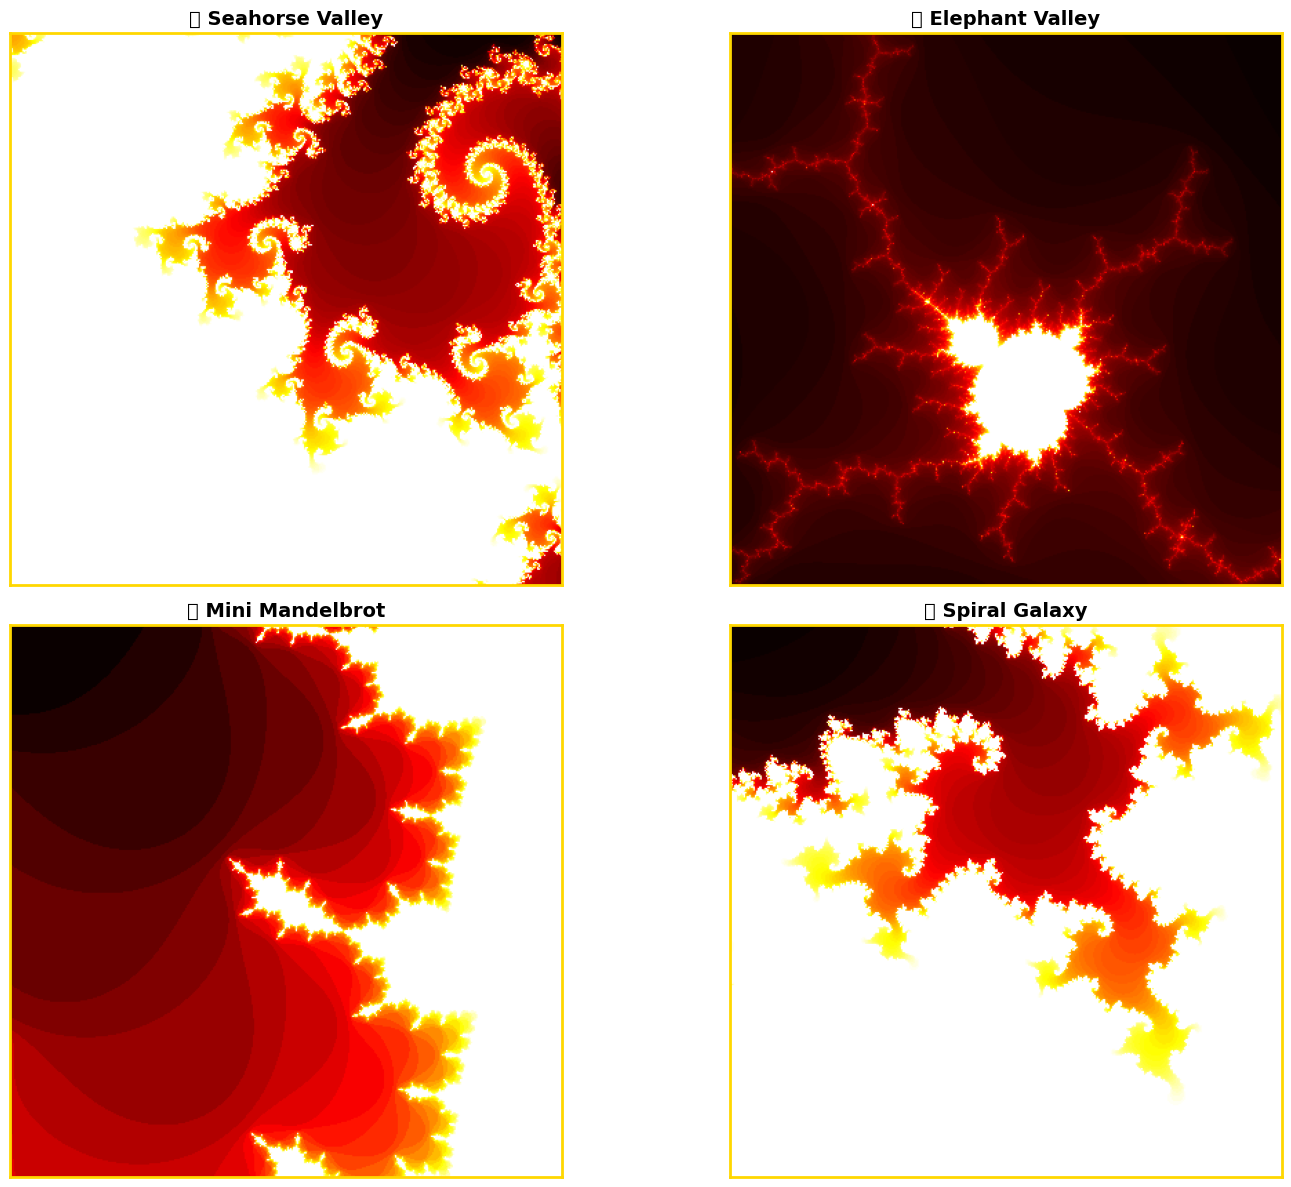

✨ Each zoom reveals infinite complexity!
🌌 The patterns repeat at different scales - this is the essence of fractals!


In [9]:
# Famous interesting regions of the Mandelbrot Set
interesting_regions = [
    (-0.8, 0.156, 0.01, "🌀 Seahorse Valley"),
    (-0.16, 1.0405, 0.026, "🌸 Elephant Valley"), 
    (-1.25066, 0.02012, 0.001, "🎭 Mini Mandelbrot"),
    (-0.7269, 0.1889, 0.004, "🦋 Spiral Galaxy")
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

print("🔍 Exploring famous Mandelbrot regions...")

for i, (center_x, center_y, size, name) in enumerate(interesting_regions):
    print(f"   Rendering: {name}")
    
    # Calculate bounds for this zoom region
    x_min = center_x - size
    x_max = center_x + size
    y_min = center_y - size
    y_max = center_y + size
    
    # Generate high-detail view of this region
    zoom_mandelbrot, zoom_bounds = create_fast_mandelbrot(
        width=400, height=400, max_iter=100,
        x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max
    )
    
    # Visualize
    ax = axes[i]
    im = ax.imshow(zoom_mandelbrot, extent=zoom_bounds, 
                   cmap='hot', origin='lower')
    ax.set_title(name, fontsize=14, weight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add artistic border
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('gold')

plt.tight_layout()
plt.show()

print("✨ Each zoom reveals infinite complexity!")
print("🌌 The patterns repeat at different scales - this is the essence of fractals!")

## Part 8: Summary and Key Takeaways

Congratulations! You've learned about both temperature data visualization and the fascinating world of fractal mathematics. Here's what we discovered:

### Temperature Visualization
- **Real Data**: Fetched current Hong Kong weather data
- **Beautiful Charts**: Created informative and artistic temperature displays
- **Data Storytelling**: Used colors and shapes to communicate information clearly

### Mandelbrot Set Mathematics  
- **The Formula**: z = z² + c creates infinite complexity
- **Fractal Beauty**: Self-similar patterns at every scale
- **Computational Art**: Mathematics becomes visual art

### Combining Both Worlds
- **Data-Driven Art**: Temperature influences colors and parameters
- **Mathematical Weather**: Weather data shapes mathematical visualizations
- **Interactive Exploration**: Different temperatures create different artistic moods

### What's Next?
- Try different zoom regions and parameters
- Experiment with other mathematical functions (Julia Sets, Newton fractals)
- Combine other real-world data with mathematical art
- Create animations showing temperature changes over time

🎨 Creating your unique temperature-influenced Mandelbrot masterpiece...
🌡️ Based on current temperature: 27°C
🎭 This artwork is unique to today's weather conditions!


C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\2227428598.py:31: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\2227428598.py:31: UserWarning: Glyph 127749 (\N{SUNRISE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\2227428598.py:31: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lyj\AppData\Local\Temp\ipykernel_18808\2227428598.py:31: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\lyj\Desktop\ime\5913\HK tem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


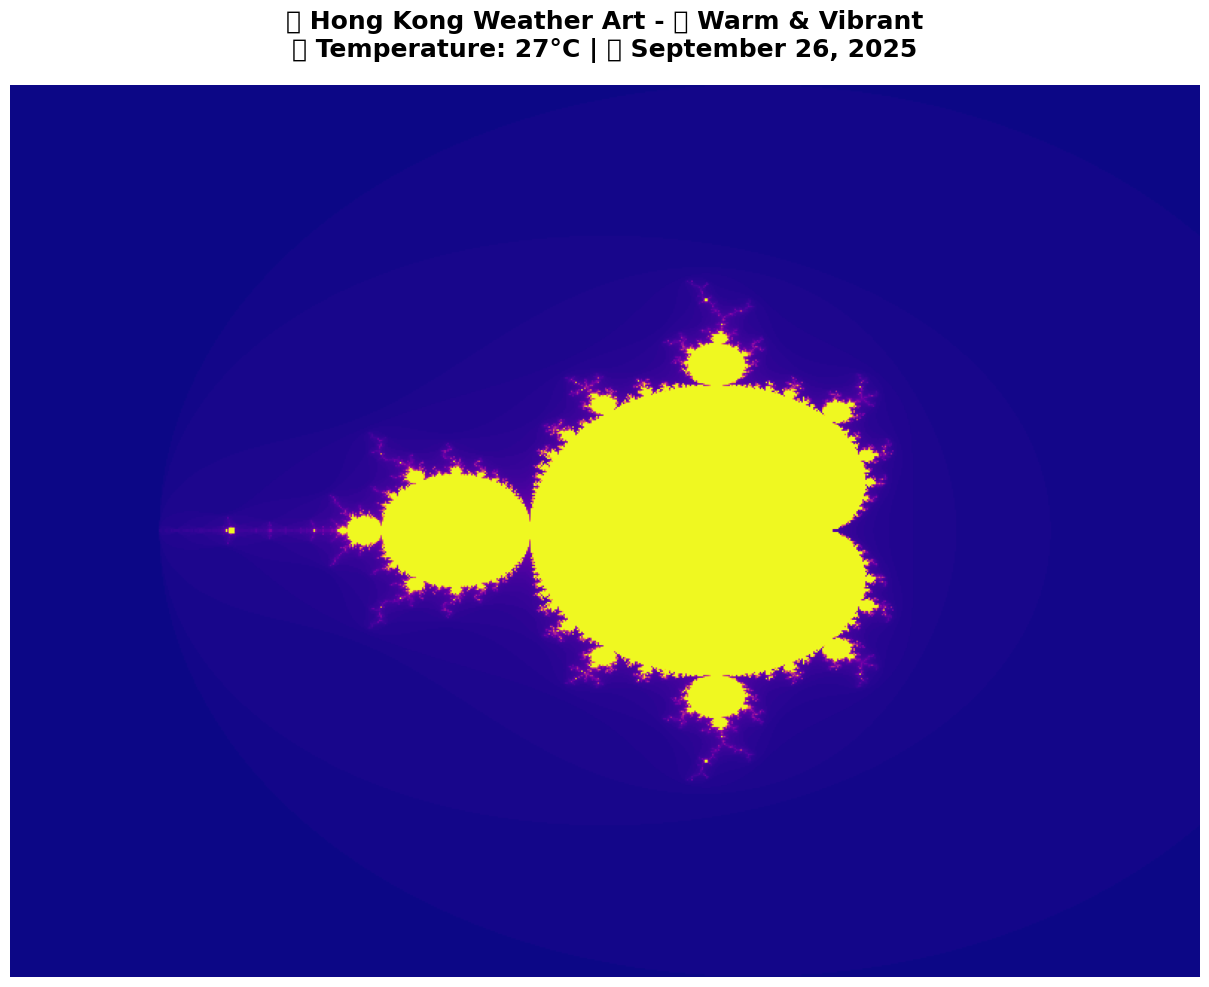

✨ Your unique mathematical weather art is complete!
🎨 This pattern will never be exactly the same again - it's influenced by today's weather!
🌟 Thank you for exploring the beautiful intersection of mathematics and meteorology!


In [10]:
# Final demonstration: Create a unique masterpiece based on current temperature
print("🎨 Creating your unique temperature-influenced Mandelbrot masterpiece...")
print(f"🌡️ Based on current temperature: {current_temp}°C")
print("🎭 This artwork is unique to today's weather conditions!")

# Create one final, large, beautiful visualization
plt.figure(figsize=(16, 10))

# Generate high-quality art
final_art, _ = create_fast_mandelbrot(width=800, height=600, max_iter=120)

# Use temperature to choose colors
if current_temp < 22:
    final_cmap = 'winter'
    mood = "❄️ Cool & Crisp"
elif current_temp < 27:
    final_cmap = 'viridis' 
    mood = "🌿 Fresh & Balanced"
elif current_temp < 32:
    final_cmap = 'plasma'
    mood = "🌅 Warm & Vibrant"
else:
    final_cmap = 'hot'
    mood = "🔥 Hot & Intense"

plt.imshow(final_art, cmap=final_cmap, origin='lower')
plt.title(f'🎭 Hong Kong Weather Art - {mood}\n🌡️ Temperature: {current_temp}°C | 📅 {datetime.now().strftime("%B %d, %Y")}', 
          fontsize=18, weight='bold', pad=20)

plt.axis('off')  # Remove axes for pure art
plt.tight_layout()
plt.show()

print("✨ Your unique mathematical weather art is complete!")
print("🎨 This pattern will never be exactly the same again - it's influenced by today's weather!")
print("🌟 Thank you for exploring the beautiful intersection of mathematics and meteorology!")